In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
employee_survey_data = pd.read_csv('employee_survey_data.csv')
general_data = pd.read_csv('general_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')


In [6]:
employee_survey_data.fillna(employee_survey_data.median())
general_data['NumCompaniesWorked'].fillna(general_data['NumCompaniesWorked'].median())
general_data['TotalWorkingYears'].fillna(general_data['TotalWorkingYears'].median())


0        1.0
1        6.0
2        5.0
3       13.0
4        9.0
        ... 
4405    10.0
4406    10.0
4407     5.0
4408    10.0
4409    10.0
Name: TotalWorkingYears, Length: 4410, dtype: float64

In [7]:
print("Missing values after cleaning:")
print("Employee Survey Data:\n", employee_survey_data.isnull().sum())
print("General Data:\n", general_data.isnull().sum())
print("Manager Survey Data:\n", manager_survey_data.isnull().sum())

Missing values after cleaning:
Employee Survey Data:
 EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64
General Data:
 Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64
Manager Survey Data:
 EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dt

In [8]:
merged_data = pd.merge(general_data, employee_survey_data, on='EmployeeID')
merged_data = pd.merge(merged_data, manager_survey_data, on='EmployeeID')

Summary Statistics:
                Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4410.000000        4410.000000   
mean      2.063946   65029.312925            2.691837          15.209524   
std       1.106689   

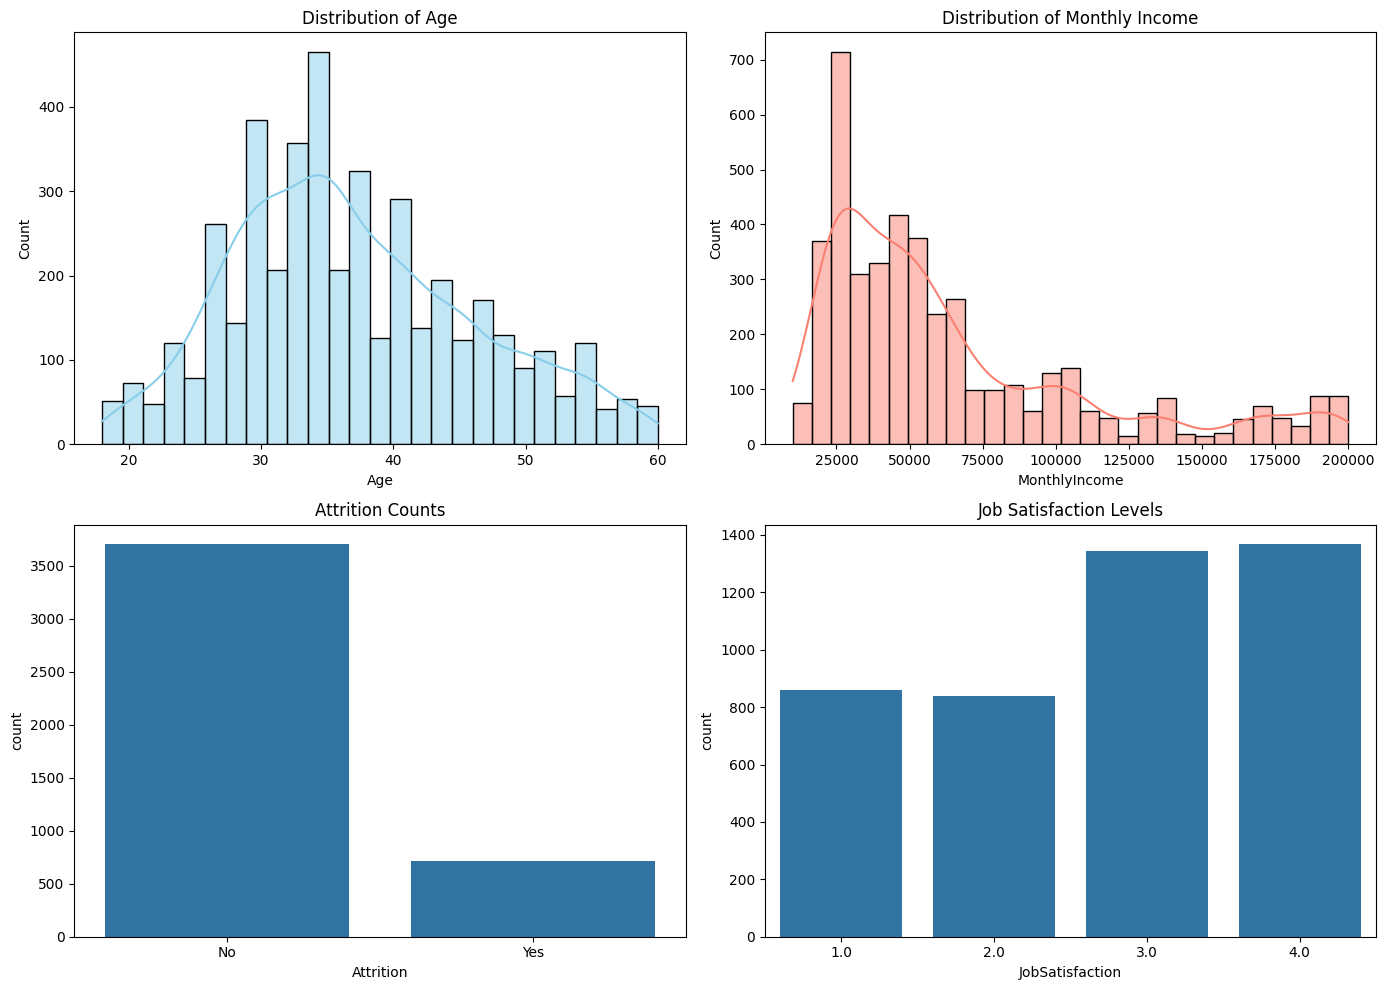

ValueError: could not convert string to float: 'No'

<Figure size 1200x800 with 0 Axes>

In [25]:
print("Summary Statistics:\n", merged_data.describe())

# Plot distributions for key numerical columns
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(merged_data['Age'], kde=True, color='skyblue')
plt.title("Distribution of Age")

plt.subplot(2, 2, 2)
sns.histplot(merged_data['MonthlyIncome'], kde=True, color='salmon')
plt.title("Distribution of Monthly Income")

plt.subplot(2, 2, 3)
sns.countplot(x='Attrition', data=merged_data)
plt.title("Attrition Counts")

plt.subplot(2, 2, 4)
sns.countplot(x='JobSatisfaction', data=merged_data)
plt.title("Job Satisfaction Levels")
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


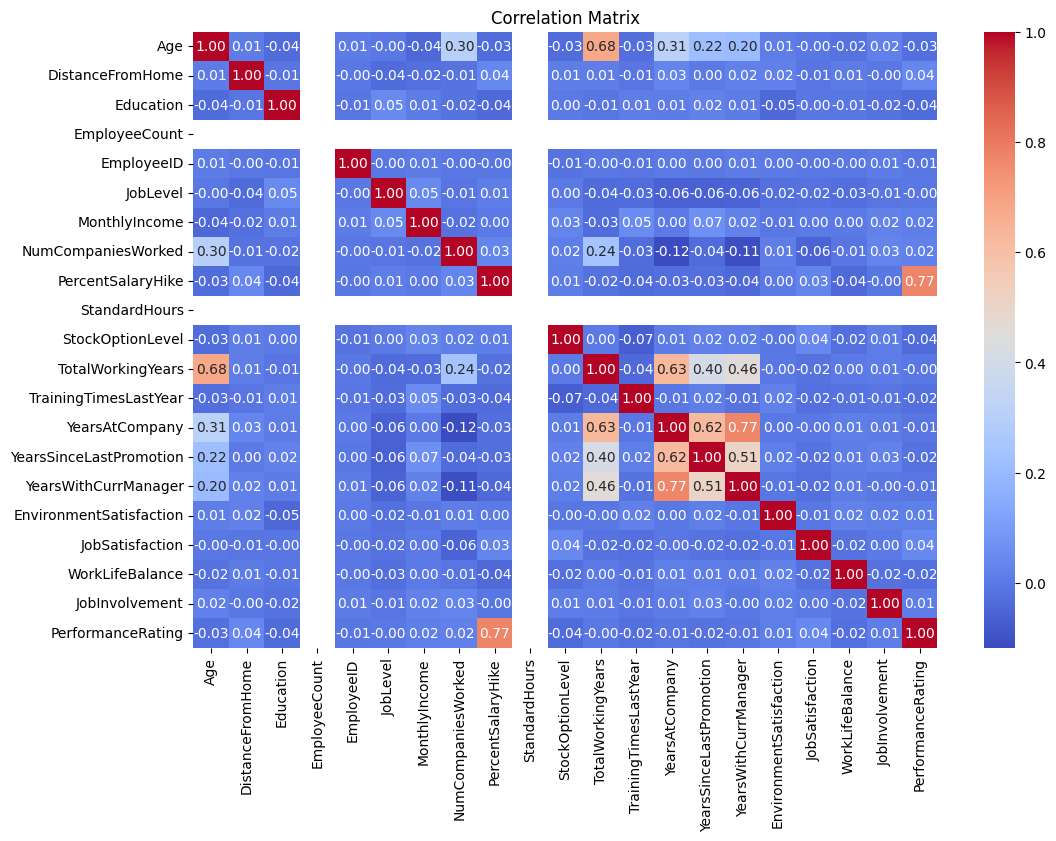

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_data = merged_data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


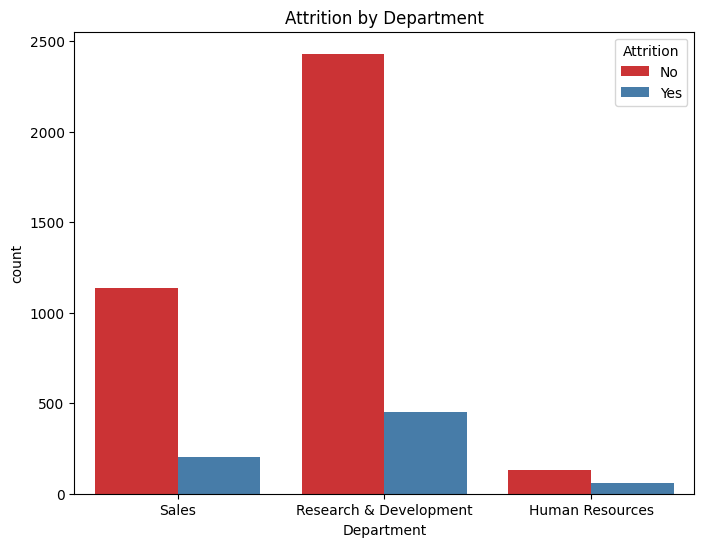

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='Attrition', data=merged_data, palette='Set1')
plt.title("Attrition by Department")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

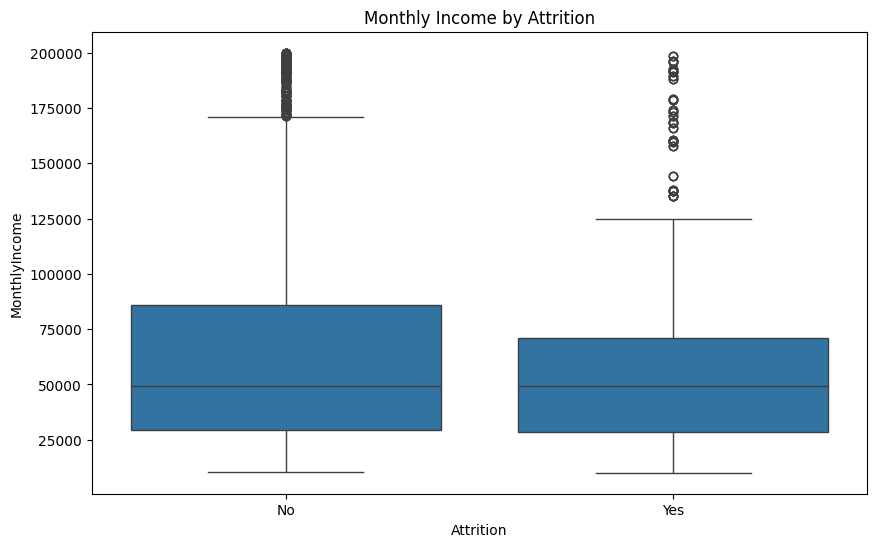

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=merged_data)
plt.title("Monthly Income by Attrition")
plt.show

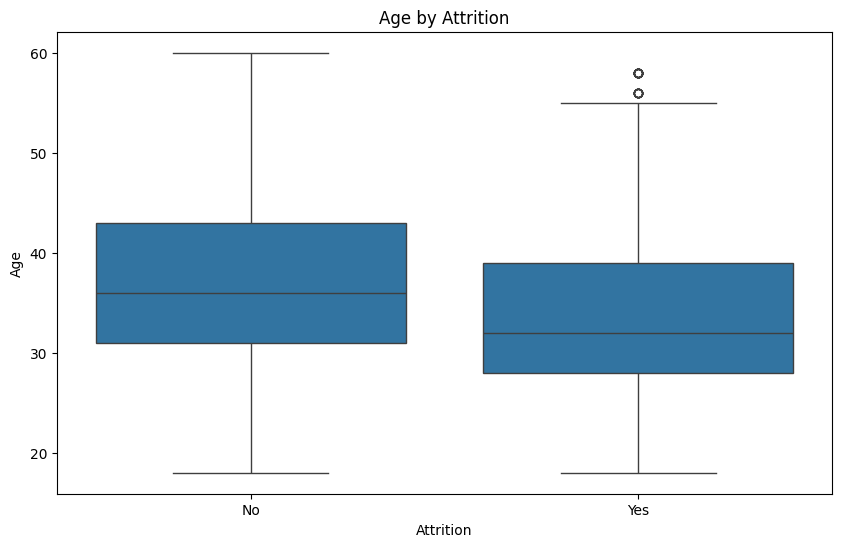

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=merged_data)
plt.title("Age by Attrition")
plt.show()

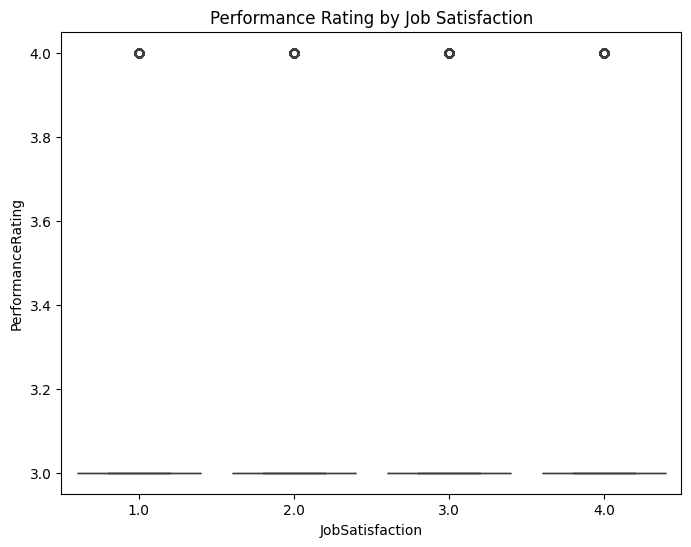

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='JobSatisfaction', y='PerformanceRating', data=merged_data)
plt.title("Performance Rating by Job Satisfaction")
plt.show()


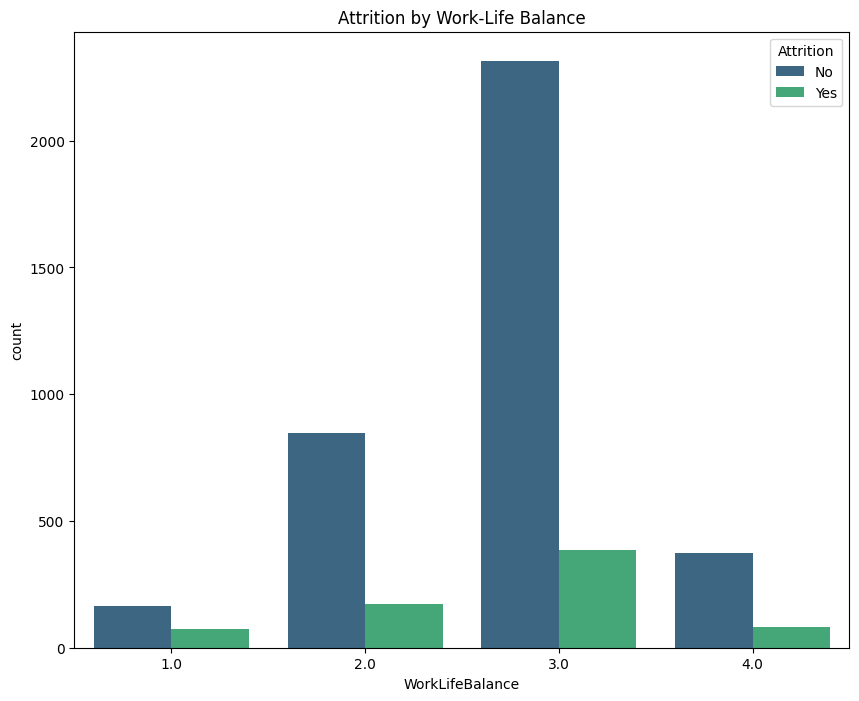

In [19]:
plt.figure(figsize=(10, 8))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=merged_data, palette='viridis')
plt.title("Attrition by Work-Life Balance")
plt.show()


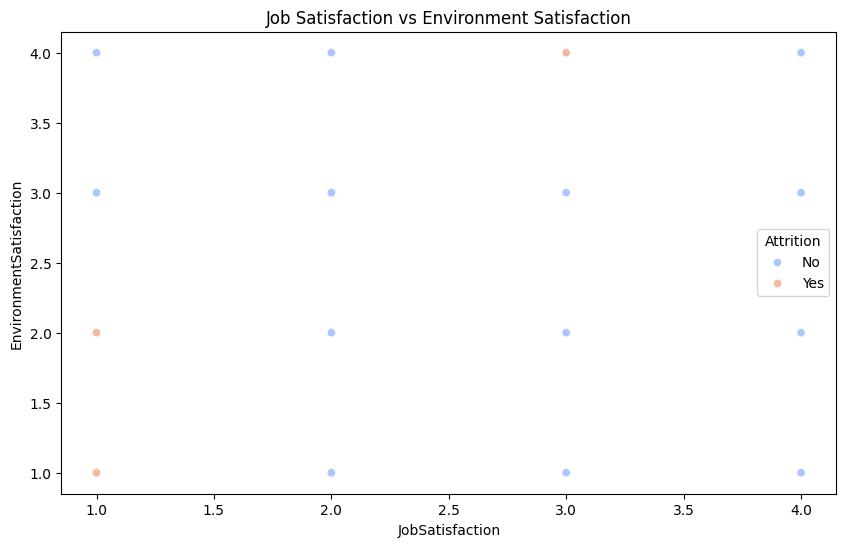

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='JobSatisfaction', y='EnvironmentSatisfaction', hue='Attrition', data=merged_data, palette='coolwarm')
plt.title("Job Satisfaction vs Environment Satisfaction")
plt.show()